In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['chuy',
 'hilo',
 'lawrenceburg',
 'almenevo',
 'kapaa',
 'kirakira',
 'tuktoyaktuk',
 'port alfred',
 'halalo',
 'jamestown',
 'kahama',
 'punta arenas',
 'hithadhoo',
 'sentyabrskiy',
 'yellowknife',
 'hobart',
 'qaanaaq',
 'khatanga',
 'marcona',
 'hermanus',
 'ligatne',
 'bredasdorp',
 'gaomi',
 'lavrentiya',
 'atherton',
 'dien bien',
 'esperance',
 'uruzgan',
 'sterling',
 'zavodouspenskoye',
 'saint george',
 'ribeira grande',
 'victoria',
 'rikitea',
 'dhidhdhoo',
 'cape town',
 'itoman',
 'taolanaro',
 'atar',
 'touros',
 'marsa matruh',
 'isangel',
 'kamenka',
 'kaitangata',
 'vaini',
 'puerto baquerizo moreno',
 'busselton',
 'leningradskiy',
 'ushuaia',
 'belvedere marittimo',
 'imeni poliny osipenko',
 'tiksi',
 'atuona',
 'petropavlovsk-kamchatskiy',
 'port angeles',
 'healdsburg',
 'rocha',
 'chokurdakh',
 'cidreira',
 'bethel',
 'narsaq',
 'tumannyy',
 'sorong',
 'honningsvag',
 'attawapiskat',
 'buala',
 'illoqqortoormiut',
 'sao filipe',
 'puerto ayora',
 'opuwo',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [10]:
#base url to build queries off of
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#test one city to see what the data looks like
test_city = "chuy"
test_url = f"{base_url}appid={weather_api_key}&q={test_city}&units={units}"
test_response = requests.get(test_url)
test_json = test_response.json()
test_json

{'coord': {'lon': -53.4616, 'lat': -33.6971},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 56.16,
  'feels_like': 54.63,
  'temp_min': 56.16,
  'temp_max': 56.16,
  'pressure': 1028,
  'humidity': 67,
  'sea_level': 1028,
  'grnd_level': 1026},
 'visibility': 10000,
 'wind': {'speed': 8.01, 'deg': 89, 'gust': 9.95},
 'clouds': {'all': 1},
 'dt': 1628879154,
 'sys': {'country': 'UY', 'sunrise': 1628849669, 'sunset': 1628888583},
 'timezone': -10800,
 'id': 3443061,
 'name': 'Chui',
 'cod': 200}

In [11]:
#create lists to hold results
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []


In [12]:
#test counting logic for the for loop below
list1 = [1,2,3,4,5,6,7,8,9,10,11]
counter = 0
set_no = 1

print('start')
print('-----')

for x in list1:
    
    if (counter<=9):
        counter = counter+1
        print(f"record {counter}, {set_no}")
    elif (counter==10):
        counter=1
        set_no = set_no +1
        print(f"record {counter}, {set_no}")
print('----')
print('end')

start
-----
record 1, 1
record 2, 1
record 3, 1
record 4, 1
record 5, 1
record 6, 1
record 7, 1
record 8, 1
record 9, 1
record 10, 1
record 1, 2
----
end


In [13]:
#create counter for sets
counter = 0
set_no =1 

print("Begin query pull")
print("---------------------")
#begin for loop
#looking at all cities in our random cities list above
for city in cities:
    
    query_url = f'{base_url}appid={weather_api_key}&q={city}&units={units}'
    response = requests.get(query_url)
    data = response.json()
    
    try:
        #add results to our empty lists we created
        city_name.append(data['name'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        windspeed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        #counting logic for print statement
        if (counter <=49):
            counter += 1
            print(f'Processing record {counter} of set {set_no}: {city}')
        
        elif (counter == 50):
            counter = 1
            set_no = set_no+1
            print(f'Processing record {counter} of set {set_no}: {city}')
    #exception handling
    except:
        print("City not found - skipping record")

print("---------------------")
print("End query pull")

Begin query pull
---------------------
Processing record 1 of set 1: chuy
Processing record 2 of set 1: hilo
Processing record 3 of set 1: lawrenceburg
City not found - skipping record
Processing record 4 of set 1: kapaa
Processing record 5 of set 1: kirakira
Processing record 6 of set 1: tuktoyaktuk
Processing record 7 of set 1: port alfred
City not found - skipping record
Processing record 8 of set 1: jamestown
Processing record 9 of set 1: kahama
Processing record 10 of set 1: punta arenas
Processing record 11 of set 1: hithadhoo
City not found - skipping record
Processing record 12 of set 1: yellowknife
Processing record 13 of set 1: hobart
Processing record 14 of set 1: qaanaaq
Processing record 15 of set 1: khatanga
City not found - skipping record
Processing record 16 of set 1: hermanus
Processing record 17 of set 1: ligatne
Processing record 18 of set 1: bredasdorp
Processing record 19 of set 1: gaomi
Processing record 20 of set 1: lavrentiya
Processing record 21 of set 1: athe

Processing record 37 of set 4: chopovychi
Processing record 38 of set 4: alikovo
City not found - skipping record
Processing record 39 of set 4: chiredzi
Processing record 40 of set 4: celestun
Processing record 41 of set 4: veraval
Processing record 42 of set 4: talnakh
Processing record 43 of set 4: esso
Processing record 44 of set 4: iqaluit
Processing record 45 of set 4: cabo san lucas
Processing record 46 of set 4: padang
Processing record 47 of set 4: les cayes
Processing record 48 of set 4: chibombo
Processing record 49 of set 4: lompoc
Processing record 50 of set 4: tadotsu
Processing record 1 of set 5: vila franca do campo
Processing record 2 of set 5: kruisfontein
Processing record 3 of set 5: medowie
Processing record 4 of set 5: ariquemes
Processing record 5 of set 5: mezen
Processing record 6 of set 5: east kilbride
Processing record 7 of set 5: misratah
Processing record 8 of set 5: ostrow mazowiecka
Processing record 9 of set 5: deputatskiy
Processing record 10 of set 5:

Processing record 28 of set 8: balabac
City not found - skipping record
City not found - skipping record
Processing record 29 of set 8: varna
Processing record 30 of set 8: saldanha
Processing record 31 of set 8: urambo
Processing record 32 of set 8: vilhena
Processing record 33 of set 8: pasni
Processing record 34 of set 8: kabalo
Processing record 35 of set 8: turayf
Processing record 36 of set 8: pak phanang
City not found - skipping record
Processing record 37 of set 8: deer lake
City not found - skipping record
Processing record 38 of set 8: busembatia
Processing record 39 of set 8: dingle
Processing record 40 of set 8: eenhana
City not found - skipping record
Processing record 41 of set 8: codrington
Processing record 42 of set 8: namatanai
Processing record 43 of set 8: magnitogorsk
Processing record 44 of set 8: nemuro
Processing record 45 of set 8: bud
Processing record 46 of set 8: clyde river
Processing record 47 of set 8: vyshkov
Processing record 48 of set 8: atbasar
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create df
city_df = pd.DataFrame({"city": city_name, "country": country, "latitude": lat, "longitude": lng, "max_temp": max_temp, "humidity": humidity,
                       "cloudiness":cloudiness, "windspeed": windspeed, "date":date})
#export to csv
city_df.to_csv("weather_by_city_output.csv")

#display df
city_df.head()

,city,country,latitude,longitude,max_temp,humidity,cloudiness,windspeed,date
0,Chui,UY,-33.6971,-53.4616,56.16,67,1,8.01,1628879154
1,Hilo,US,19.7297,-155.0900,76.12,83,40,5.75,1628879176
2,Lawrenceburg,US,38.0373,-84.8966,90.72,66,64,10.42,1628879176
3,Kapaa,US,22.0752,-159.3190,80.92,76,40,3.00,1628879176
4,Kirakira,SB,-10.4544,161.9205,77.54,89,83,9.46,1628879177


In [16]:
city_df.describe()

,latitude,longitude,max_temp,humidity,cloudiness,windspeed,date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.662778,18.616446,70.655696,69.381555,51.698011,7.657667,1.628879e+09
std,33.036391,90.202320,15.201614,22.742434,37.763484,5.404819,7.534239e+01
min,-54.800000,-179.166700,37.060000,7.000000,0.000000,0.000000,1.628879e+09
25%,-5.900000,-60.673300,59.050000,57.000000,13.000000,3.440000,1.628879e+09
50%,25.016700,25.970400,72.480000,76.000000,55.000000,6.330000,1.628879e+09
75%,49.141400,99.216100,81.360000,87.000000,90.000000,10.360000,1.628879e+09
max,78.218600,179.316700,111.240000,100.000000,100.000000,29.930000,1.628879e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#not applicable, max humidity is 100.00

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

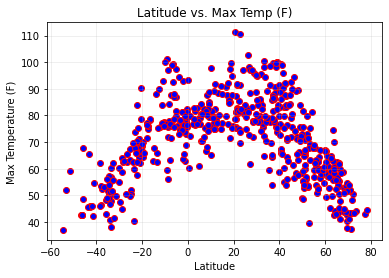

In [26]:
#x and y axes
lat_x = city_df['latitude']
temp_y = city_df['max_temp']

#plotting and formatting
plt.scatter(lat_x, temp_y, color='blue', edgecolor='red')
plt.title("Latitude vs. Max Temp (F)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=.25)
plt.savefig("f1_lat_v_temp", facecolor="white")
plt.show()

In [ ]:
#plot shows max temp vs. latitude. temperatures are highest between -20 and 40 latitude (near the equator) 

## Latitude vs. Humidity Plot

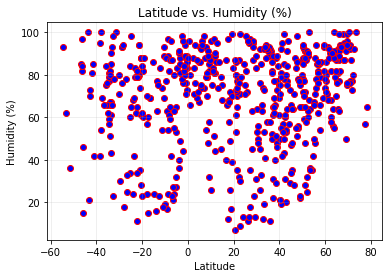

In [27]:
#x and y axes
lat_x = city_df['latitude']
humid_y = city_df['humidity']

#plotting and formatting
plt.scatter(lat_x, humid_y, color='blue', edgecolor='red')
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid(alpha=.25)
plt.savefig("f2_lat_v_humid", facecolor="white")
plt.show()

In [29]:
#plot shows humidity % vs. latitude. majority of data set > 60% humidity cities
# no visible trend between lat and humidity based on the above scatter

## Latitude vs. Cloudiness Plot

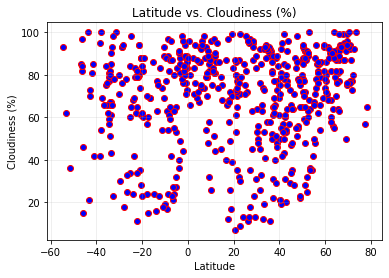

In [28]:
#x and y axes
lat_x = city_df['latitude']
cloud_y = city_df['cloudiness']

#plotting and formatting
plt.scatter(lat_x, humid_y, color='blue', edgecolor='red')
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=.25)
plt.savefig("f3_lat_v_cloud", facecolor="white")
plt.show()

In [30]:
# plot shows cloudiness % vs. lat
# appears that northern hemispher is cloudier (lat > 0)

## Latitude vs. Wind Speed Plot

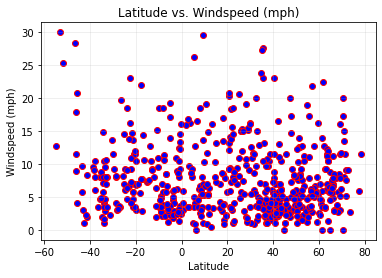

In [31]:
#x and y axes
lat_x = city_df['latitude']
wind_y = city_df['windspeed']

#plotting and formatting
plt.scatter(lat_x, wind_y, color='blue', edgecolor='red')
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel("Latitude")
plt.ylabel('Windspeed (mph)')
plt.grid(alpha=.25)
plt.savefig("f4_lat_v_wind", facecolor="white")
plt.show()

In [32]:
# plot shows latitude vs. wind speed
# majority of dataset < 15 mph winds
# higher windspeed at each end of the latitude - i.e. the poles are the windiest 

## Linear Regression

In [34]:
#create variables to hold northern hempishpere (and equator based on readme) and southern hempisphere
noh = city_df.loc[city_df['latitude'] >= 0]
soh = city_df.loc[city_df['latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.4399052886745926


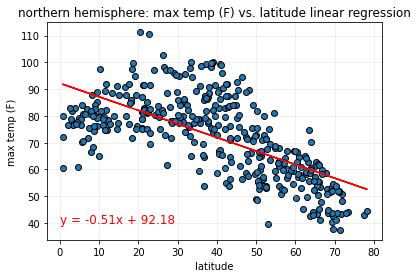

In [39]:
#x and y axes
r_lat_x = noh['latitude']
r_temp_y = noh['max_temp']

#regression calculation
(r1_slope, r1_intercept, r1_rvalue, r1_pvalue, r1_stderr) = linregress(r_lat_x, r_temp_y)

regr_values = r_lat_x * r1_slope + r1_intercept
regr_eq = f'y = {r1_slope:.2f}x + {r1_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_temp_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('max temp (F)')
plt.title('northern hemisphere: max temp (F) vs. latitude linear regression')
plt.annotate(regr_eq, (0,40), fontsize = 12, color='red')

#save output

plt.savefig('r1_nh_lat_v_temp', facecolor = 'white')

#show plot
print(f'the r-value is: {r1_rvalue ** 2}')
plt.show()

In [ ]:
# weather gets colder the further we move from the equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.6214447993120181


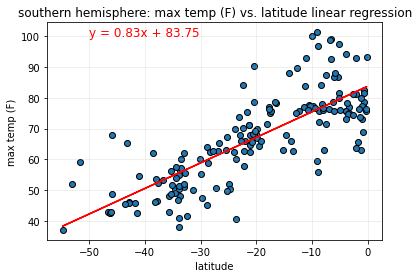

In [45]:
#x and y axes
r_lat_x = soh['latitude']
r_temp_y = soh['max_temp']

#regression calculation
(r2_slope, r2_intercept, r2_rvalue, r2_pvalue, r2_stderr) = linregress(r_lat_x, r_temp_y)

regr_values = r_lat_x * r2_slope + r2_intercept
regr_eq = f'y = {r2_slope:.2f}x + {r2_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_temp_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha = .25)

plt.xlabel('latitude')
plt.ylabel('max temp (F)')
plt.title('southern hemisphere: max temp (F) vs. latitude linear regression')
plt.annotate(regr_eq,(-50,100) ,fontsize=12, color ='red')

#save output
plt.savefig('r2_sh_lat_v_temp', facecolor='white')

#show plot
print(f'the r-value is: {r2_rvalue ** 2}')
plt.show()

In [46]:
#weather gets warmer the closer we get to the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.011263957116367133


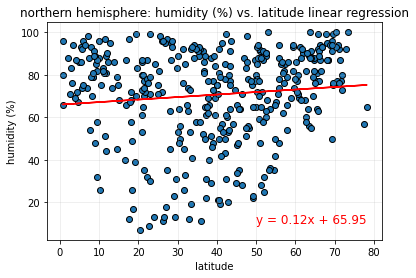

In [51]:
#x and y axes
r_lat_x = noh['latitude']
r_humid_y = noh['humidity']

#regression calculation
(r3_slope, r3_intercept, r3_rvalue, r3_pvalue, r3_stderr) = linregress(r_lat_x, r_humid_y)

regr_values = r_lat_x * r3_slope + r3_intercept
regr_eq = f'y = {r3_slope:.2f}x + {r3_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_humid_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title('northern hemisphere: humidity (%) vs. latitude linear regression')
plt.annotate(regr_eq, (50,10), fontsize = 12, color='red')

#save output

plt.savefig('r3_nh_lat_v_humid', facecolor = 'white')

#show plot
print(f'the r-value is: {r3_rvalue ** 2}')
plt.show()

In [ ]:
#r value indicates no significant relationship between humidity % and latitude in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 2.513089431077541e-05


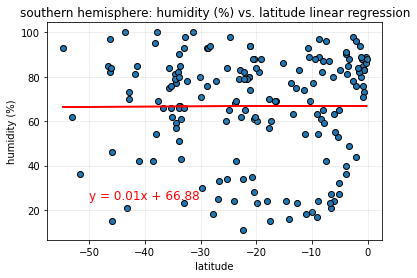

In [54]:
#x and y axes
r_lat_x = soh['latitude']
r_humid_y = soh['humidity']

#regression calculation
(r4_slope, r4_intercept, r4_rvalue, r4_pvalue, r4_stderr) = linregress(r_lat_x, r_humid_y)

regr_values = r_lat_x * r4_slope + r4_intercept
regr_eq = f'y = {r4_slope:.2f}x + {r4_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_humid_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title('southern hemisphere: humidity (%) vs. latitude linear regression')
plt.annotate(regr_eq, (-50,25), fontsize = 12, color='red')

#save output

plt.savefig('r4_sh_lat_v_humid', facecolor = 'white')

#show plot
print(f'the r-value is: {r4_rvalue ** 2}')
plt.show()

In [ ]:
#r value indicates no significant relationship between humidity % and latitude in the southern hemisphere 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.0007398876000831045


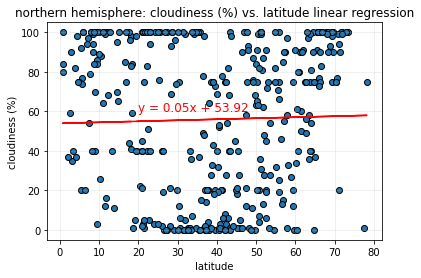

In [56]:
#x and y axes
r_lat_x = noh['latitude']
r_cloud_y = noh['cloudiness']

#regression calculation
(r5_slope, r5_intercept, r5_rvalue, r5_pvalue, r5_stderr) = linregress(r_lat_x, r_cloud_y)

regr_values = r_lat_x * r5_slope + r5_intercept
regr_eq = f'y = {r5_slope:.2f}x + {r5_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_cloud_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.title('northern hemisphere: cloudiness (%) vs. latitude linear regression')
plt.annotate(regr_eq, (20,60), fontsize = 12, color='red')

#save output

plt.savefig('r5_nh_lat_v_cloud', facecolor = 'white')

#show plot
print(f'the r-value is: {r5_rvalue ** 2}')
plt.show()

In [64]:
# r value indicates there is no significant relationship between lat and cloudiness in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.16448120809926903


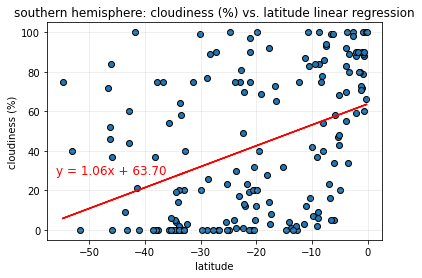

In [63]:
#x and y axes
r_lat_x = soh['latitude']
r_cloud_y = soh['cloudiness']

#regression calculation
(r6_slope, r6_intercept, r6_rvalue, r6_pvalue, r6_stderr) = linregress(r_lat_x, r_cloud_y)

regr_values = r_lat_x * r6_slope + r6_intercept
regr_eq = f'y = {r6_slope:.2f}x + {r6_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_cloud_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.title('southern hemisphere: cloudiness (%) vs. latitude linear regression')
plt.annotate(regr_eq, (-56,28), fontsize = 12, color='red')

#save output

plt.savefig('r6_sh_lat_v_cloud', facecolor = 'white')

#show plot
print(f'the r-value is: {r6_rvalue ** 2}')
plt.show()

In [ ]:
# r value indicates there is a mild relationship between cloudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.004346183140137177


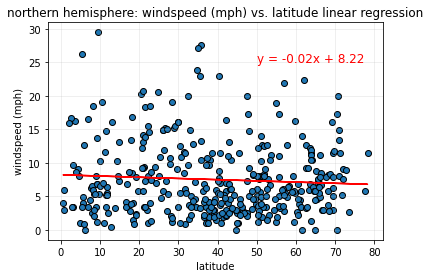

In [66]:
#x and y axes
r_lat_x = noh['latitude']
r_wind_y = noh['windspeed']

#regression calculation
(r7_slope, r7_intercept, r7_rvalue, r7_pvalue, r7_stderr) = linregress(r_lat_x, r_wind_y)

regr_values = r_lat_x * r7_slope + r7_intercept
regr_eq = f'y = {r7_slope:.2f}x + {r7_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_wind_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.title('northern hemisphere: windspeed (mph) vs. latitude linear regression')
plt.annotate(regr_eq, (50,25), fontsize = 12, color='red')

#save output

plt.savefig('r7_nh_lat_v_wind', facecolor = 'white')

#show plot
print(f'the r-value is: {r7_rvalue ** 2}')
plt.show()

In [69]:
# r value indicates no significant relationship between windspeed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.03668363503663601


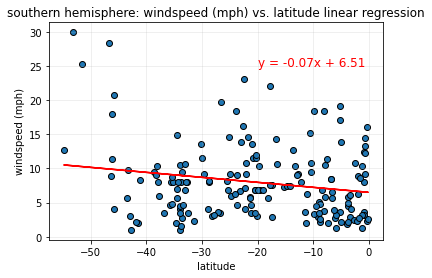

In [68]:
#x and y axes
r_lat_x = soh['latitude']
r_wind_y = soh['windspeed']

#regression calculation
(r8_slope, r8_intercept, r8_rvalue, r8_pvalue, r8_stderr) = linregress(r_lat_x, r_wind_y)

regr_values = r_lat_x * r8_slope + r8_intercept
regr_eq = f'y = {r8_slope:.2f}x + {r8_intercept:.2f}'

#format and plot
plt.scatter(r_lat_x, r_wind_y, edgecolor = 'black')
plt.plot(r_lat_x, regr_values, "r-")
plt.grid(alpha=.25)

plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.title('southern hemisphere: windspeed (mph) vs. latitude linear regression')
plt.annotate(regr_eq, (-20,25), fontsize = 12, color='red')

#save output

plt.savefig('r8_sh_lat_v_wind', facecolor = 'white')

#show plot
print(f'the r-value is: {r8_rvalue ** 2}')
plt.show()

In [70]:
# r value indicates no significant relationship between windspeed and latitude in the southern hemisphere